In [1]:
# The following lines import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels

In [2]:
#Import data
df = pd.read_csv('population_by_country_2020_ori.csv')
df.info();df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%


In [3]:

HDI = pd.read_csv('HDR21-22_Statistical_Annex_HDI_Trends_Table.csv')
HDI.info();HDI.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HDI_rank     191 non-null    float64
 1   Country      191 non-null    object 
 2   1990         191 non-null    object 
 3   Unnamed: 3   0 non-null      float64
 4   2000         191 non-null    object 
 5   Unnamed: 5   0 non-null      float64
 6   2010         191 non-null    object 
 7   Unnamed: 7   0 non-null      float64
 8   2015         191 non-null    object 
 9   Unnamed: 9   0 non-null      float64
 10  2018         191 non-null    float64
 11  Unnamed: 11  0 non-null      float64
 12  2019         191 non-null    float64
 13  Unnamed: 13  0 non-null      float64
 14  2020         191 non-null    float64
 15  Unnamed: 15  0 non-null      float64
 16  2021         191 non-null    float64
 17  Unnamed: 17  0 non-null      float64
 18  2015-2021    191 non-null    object 
 19  a       

,HDI_rank,Country,1990,Unnamed: 3,2000,Unnamed: 5,2010,Unnamed: 7,2015,Unnamed: 9,...,Unnamed: 17,2015-2021,a,1990-2000,Unnamed: 21,2000-2010,Unnamed: 23,2010-2021,Unnamed: 25,1990-2021
0,1.0,Switzerland,0.851,NaN,0.887,NaN,0.942,NaN,0.954,NaN,...,NaN,0,NaN,0.42,NaN,0.60,NaN,0.19,NaN,0.40
1,2.0,Norway,0.838,NaN,0.913,NaN,0.941,NaN,0.953,NaN,...,NaN,0,NaN,0.86,NaN,0.30,NaN,0.19,NaN,0.44
2,3.0,Iceland,0.811,NaN,0.871,NaN,0.902,NaN,0.945,NaN,...,NaN,0,NaN,0.72,NaN,0.35,NaN,0.56,NaN,0.54
3,4.0,"Hong Kong, China (SAR)",0.788,NaN,0.851,NaN,0.907,NaN,0.935,NaN,...,NaN,3,NaN,0.77,NaN,0.64,NaN,0.44,NaN,0.61
4,5.0,Australia,0.865,NaN,0.896,NaN,0.923,NaN,0.933,NaN,...,NaN,3,NaN,0.35,NaN,0.30,NaN,0.27,NaN,0.31


In [4]:
df.rename(columns = {'Country (or dependency)':'Country','Population (2020)':'Population','Yearly Change':'Yearly_Change','Net Change':'Net_Change','Density (P/Km²)':'Density','Land Area (Km²)':'Land_Area','Migrants (net)':'Migrants','Fert. Rate':'FertRate','Med. Age':'MedAge','Urban Pop %':'UrbanPop','World Share':'World_Share'}, inplace = True)

In [5]:
df

,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,FertRate,MedAge,UrbanPop,World_Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06%,3,50,100,NaN,N.A.,N.A.,10%,0.00%
231,Falkland Islands,3480,3.05%,103,0,12170,NaN,N.A.,N.A.,66%,0.00%
232,Niue,1626,0.68%,11,6,260,NaN,N.A.,N.A.,46%,0.00%
233,Tokelau,1357,1.27%,17,136,10,NaN,N.A.,N.A.,0%,0.00%


In [6]:
##Check the row and count of null values and delete the rows with null values

In [7]:
df.isnull().sum(axis=0).sort_values(ascending=False)[0:11]

df.drop(df[df.Migrants.isna()].index.array, axis=0, inplace=True)
df.drop(df[df.UrbanPop == 'N.A.'].index.array, axis=0, inplace=True)
df

,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,FertRate,MedAge,UrbanPop,World_Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...
196,Aruba,106766,0.43%,452,593,180,201.0,1.9,41,44%,0.00%
197,Tonga,105695,1.15%,1201,147,720,-800.0,3.6,22,24%,0.00%
198,U.S. Virgin Islands,104425,-0.15%,-153,298,350,-451.0,2,43,96%,0.00%
199,Seychelles,98347,0.62%,608,214,460,-200.0,2.5,34,56%,0.00%


In [8]:
HDI = HDI.loc[:,['HDI_rank','Country','2020']]
HDI.drop(HDI[HDI.Country.isna()].index.array, axis=0, inplace=True)
HDI.rename(columns = {'2020':'HDI2020'}, inplace = True)
HDI

,HDI_rank,Country,HDI2020
0,1.0,Switzerland,0.956
1,2.0,Norway,0.959
2,3.0,Iceland,0.957
3,4.0,"Hong Kong, China (SAR)",0.949
4,5.0,Australia,0.947
...,...,...,...
186,187.0,Burundi,0.426
187,188.0,Central African Republic,0.407
188,189.0,Niger,0.401
189,190.0,Chad,0.397


In [9]:
HP = pd.merge(df,HDI,on='Country',how='inner')
HP


,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,FertRate,MedAge,UrbanPop,World_Share,HDI_rank,HDI2020
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%,79.0,0.764
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%,132.0,0.642
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%,21.0,0.920
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%,114.0,0.709
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%,161.0,0.543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Kiribati,119449,1.57%,1843,147,810,-800.0,3.6,23,57%,0.00%,136.0,0.623
157,Grenada,112523,0.46%,520,331,340,-200.0,2.1,32,35%,0.00%,68.0,0.792
158,Tonga,105695,1.15%,1201,147,720,-800.0,3.6,22,24%,0.00%,91.0,0.745
159,Seychelles,98347,0.62%,608,214,460,-200.0,2.5,34,56%,0.00%,72.0,0.793


In [10]:
HP.head()

,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,FertRate,MedAge,UrbanPop,World_Share,HDI_rank,HDI2020
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%,79.0,0.764
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%,132.0,0.642
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%,21.0,0.920
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%,114.0,0.709
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%,161.0,0.543


In [11]:
HP['Yearly_Change'] = (HP['Yearly_Change'].str.strip('%').astype(float))
HP['UrbanPop'] = (HP['UrbanPop'].str.strip('%').astype(float))
HP['World_Share'] = (HP['World_Share'].str.strip('%').astype(float))


In [12]:
HP['FertRate'] = HP['FertRate'].astype(float)
HP['MedAge'] = HP['MedAge'].astype(float)

In [13]:
HP


,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,FertRate,MedAge,UrbanPop,World_Share,HDI_rank,HDI2020
0,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47,79.0,0.764
1,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70,132.0,0.642
2,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25,21.0,0.920
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51,114.0,0.709
4,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83,161.0,0.543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Kiribati,119449,1.57,1843,147,810,-800.0,3.6,23.0,57.0,0.00,136.0,0.623
157,Grenada,112523,0.46,520,331,340,-200.0,2.1,32.0,35.0,0.00,68.0,0.792
158,Tonga,105695,1.15,1201,147,720,-800.0,3.6,22.0,24.0,0.00,91.0,0.745
159,Seychelles,98347,0.62,608,214,460,-200.0,2.5,34.0,56.0,0.00,72.0,0.793


<AxesSubplot:xlabel='Country'>

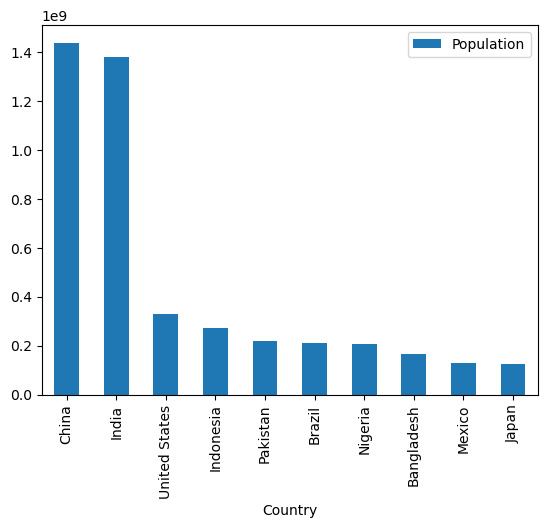

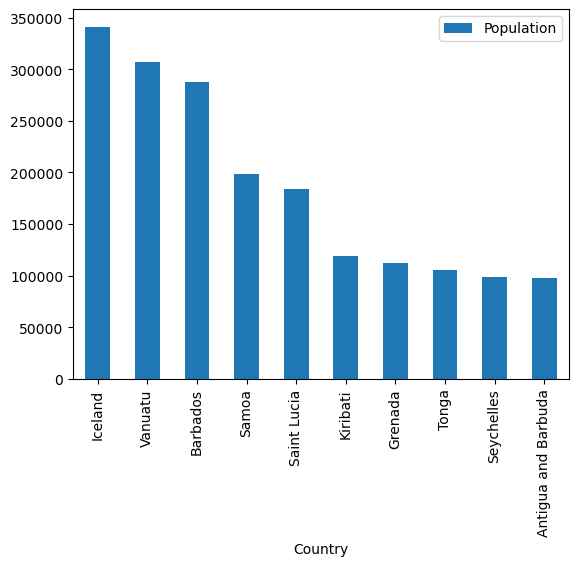

In [14]:

HP[:10].plot(x='Country',y='Population',kind = 'bar')
HP[-10:].plot(x='Country',y='Population',kind = 'bar')

<AxesSubplot:xlabel='Country'>

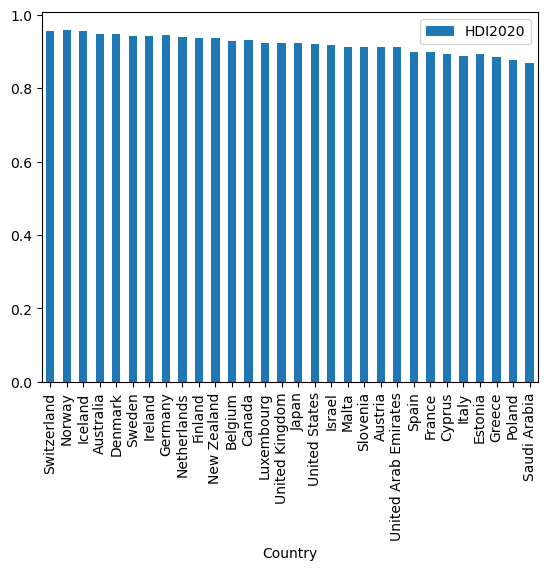

In [15]:

HDISORT = HP.sort_values(by="HDI_rank")
HDISORT
HDISORT[:30].plot(x='Country',y='HDI2020',kind = 'bar')

In [16]:
HP.corr()

,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,FertRate,MedAge,UrbanPop,World_Share,HDI_rank,HDI2020
Population,1.000000,-0.049543,0.858897,0.064494,0.524429,-0.325709,-0.069422,0.036349,-0.036713,0.999999,0.019601,-0.009922
Yearly_Change,-0.049543,1.000000,0.143145,0.027302,-0.002019,-0.040778,0.840203,-0.859264,-0.371350,-0.049494,0.691580,-0.703619
Net_Change,0.858897,0.143145,1.000000,0.071729,0.370440,-0.370765,0.123938,-0.165603,-0.161094,0.858722,0.189914,-0.178695
Density,0.064494,0.027302,0.071729,1.000000,-0.136983,-0.110606,-0.152815,0.095280,-0.012595,0.064535,-0.105266,0.108239
Land_Area,0.524429,-0.002019,0.370440,-0.136983,1.000000,0.238272,-0.070567,0.074119,0.165609,0.524501,-0.116802,0.109266
Migrants,-0.325709,-0.040778,-0.370765,-0.110606,0.238272,1.000000,-0.136594,0.216521,0.293704,-0.325564,-0.318297,0.304549
FertRate,-0.069422,0.840203,0.123938,-0.152815,-0.070567,-0.136594,1.000000,-0.887198,-0.519416,-0.069528,0.828270,-0.856969
MedAge,0.036349,-0.859264,-0.165603,0.095280,0.074119,0.216521,-0.887198,1.000000,0.561620,0.036391,-0.901369,0.891391
UrbanPop,-0.036713,-0.371350,-0.161094,-0.012595,0.165609,0.293704,-0.519416,0.561620,1.000000,-0.036515,-0.673386,0.674719
World_Share,0.999999,-0.049494,0.858722,0.064535,0.524501,-0.325564,-0.069528,0.036391,-0.036515,1.000000,0.019494,-0.009811


In [17]:
print(list(HP.columns))
print(list(HP.median().index))

['Country', 'Population', 'Yearly_Change', 'Net_Change', 'Density', 'Land_Area', 'Migrants', 'FertRate', 'MedAge', 'UrbanPop', 'World_Share', 'HDI_rank', 'HDI2020']
['Population', 'Yearly_Change', 'Net_Change', 'Density', 'Land_Area', 'Migrants', 'FertRate', 'MedAge', 'UrbanPop', 'World_Share', 'HDI_rank', 'HDI2020']


/var/folders/tr/kjy5d3z13md9ktq5917n2p9c0000gn/T/ipykernel_1725/1490829245.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(list(HP.median().index))


In [18]:
# mean var median
col_list = HP.columns[1:]
mean_list = HP.mean().tolist()
var_list = HP.var().tolist()
median_list = HP.median().tolist()

/var/folders/tr/kjy5d3z13md9ktq5917n2p9c0000gn/T/ipykernel_1725/2066481998.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_list = HP.mean().tolist()
/var/folders/tr/kjy5d3z13md9ktq5917n2p9c0000gn/T/ipykernel_1725/2066481998.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_list = HP.var().tolist()
/var/folders/tr/kjy5d3z13md9ktq5917n2p9c0000gn/T/ipykernel_1725/2066481998.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_list = HP.median().tolist()


In [19]:
all_list = []
all_list.append(mean_list)
all_list.append(var_list)
all_list.append(median_list)


index_list = ["mean", "var", "median"]

HP_new = pd.DataFrame(all_list, columns=col_list, index=index_list)
HP_new

,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,FertRate,MedAge,UrbanPop,World_Share,HDI_rank,HDI2020
mean,4.350300e+07,1.247764,4.492479e+05,161.347826,6.435928e+05,4.899273e+03,2.758385,30.006211,58.273292,0.558199,97.298137,0.716919
var,2.603105e+16,1.168606,1.747632e+12,80413.815761,2.448363e+12,1.428094e+10,1.622320,82.281211,499.037345,4.284262,3175.448059,0.023537
median,9.537645e+06,1.180000,8.458200e+04,83.000000,1.433500e+05,-1.000000e+03,2.300000,29.000000,58.000000,0.120000,97.000000,0.734000


In [20]:
df_m_m_f = HP[["Migrants", "MedAge", "UrbanPop"]]
df_m_m_f

,Migrants,MedAge,UrbanPop
0,-348399.0,38.0,61.0
1,-532687.0,28.0,35.0
2,954806.0,38.0,83.0
3,-98955.0,30.0,56.0
4,-233379.0,23.0,35.0
...,...,...,...
156,-800.0,23.0,57.0
157,-200.0,32.0,35.0
158,-800.0,22.0,24.0
159,-200.0,34.0,56.0


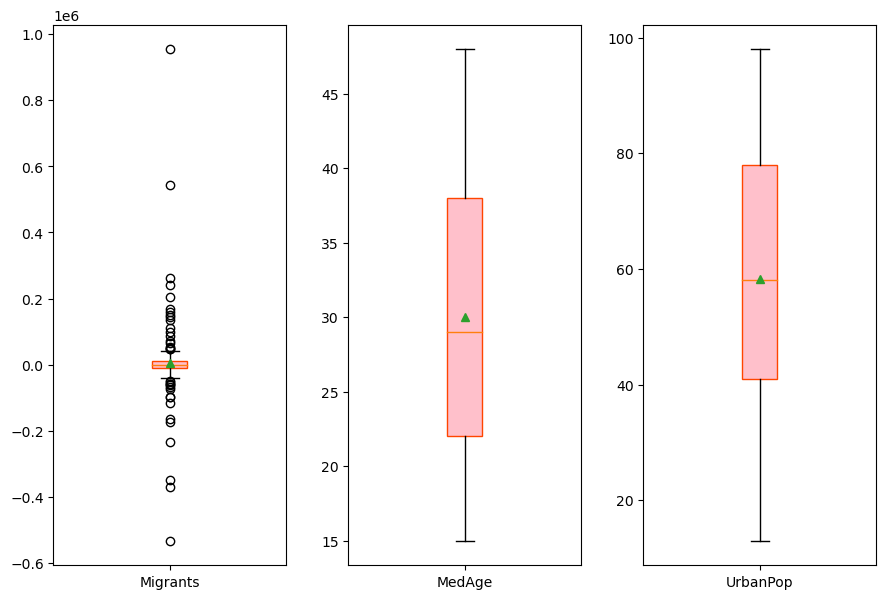

In [21]:
fig_boxplot, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(9, 6))
fig_boxplot.tight_layout()

# Migrants
ax0.boxplot([df_m_m_f["Migrants"].tolist()],
            labels = ['Migrants'],
            showmeans = True, 
            patch_artist = True, 
            boxprops = {'color':'orangered','facecolor':'pink'})

# MedAge
ax1.boxplot([df_m_m_f["MedAge"].tolist()],
            labels = ['MedAge'],
            showmeans = True, 
            patch_artist = True, 
            boxprops = {'color':'orangered','facecolor':'pink'})

# UrbanPop
ax2.boxplot([df_m_m_f["UrbanPop"].tolist()],
            labels = ['UrbanPop'],
            showmeans = True, 
            patch_artist = True, 
            boxprops = {'color':'orangered','facecolor':'pink'})

plt.show()
plt.close('all')

In [22]:
df_m_m_f = HP[["Migrants", "Population", "HDI2020"]]
df_m_m_f

,Migrants,Population,HDI2020
0,-348399.0,1439323776,0.764
1,-532687.0,1380004385,0.642
2,954806.0,331002651,0.920
3,-98955.0,273523615,0.709
4,-233379.0,220892340,0.543
...,...,...,...
156,-800.0,119449,0.623
157,-200.0,112523,0.792
158,-800.0,105695,0.745
159,-200.0,98347,0.793


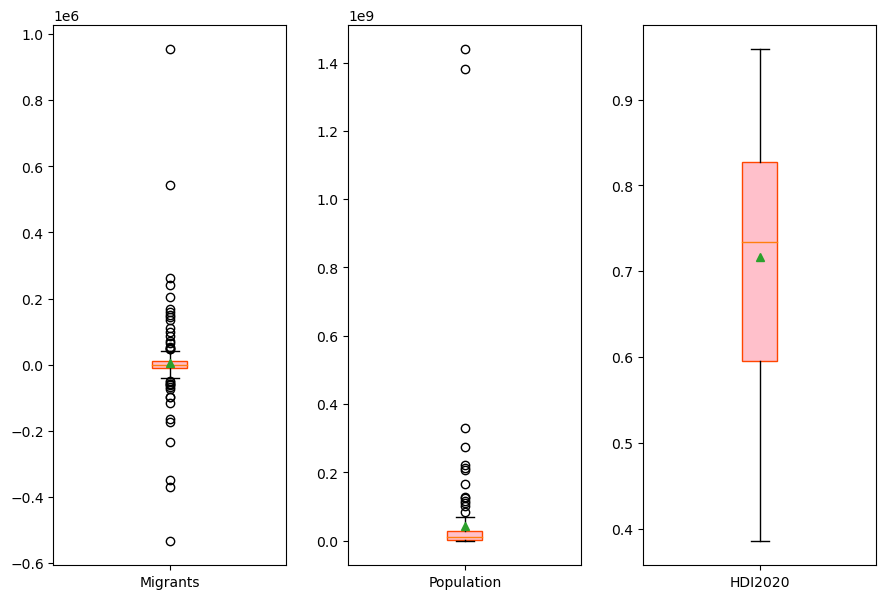

In [23]:
fig_boxplot, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(9, 6))
fig_boxplot.tight_layout()

# Migrants
ax0.boxplot([df_m_m_f["Migrants"].tolist()],
            labels = ['Migrants'],
            showmeans = True, 
            patch_artist = True, 
            boxprops = {'color':'orangered','facecolor':'pink'})

# MedAge
ax1.boxplot([df_m_m_f["Population"].tolist()],
            labels = ['Population'],
            showmeans = True, 
            patch_artist = True, 
            boxprops = {'color':'orangered','facecolor':'pink'})

# UrbanPop
ax2.boxplot([df_m_m_f["HDI2020"].tolist()],
            labels = ['HDI2020'],
            showmeans = True, 
            patch_artist = True, 
            boxprops = {'color':'orangered','facecolor':'pink'})

plt.show()
plt.close('all')

In [24]:
HP=HP.drop(["Country"],axis=1)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [25]:
HP = HP.copy()
for c in HP.columns.values:
    HP[c] = mms.fit_transform(HP[c].values.reshape(-1,1))
HP.head()

,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,FertRate,MedAge,UrbanPop,World_Share,HDI_rank,HDI2020
0,1.000000,0.335260,0.424032,0.067501,1.000000,0.123892,0.070175,0.696970,0.564706,1.000000,0.410526,0.659686
1,0.958784,0.450867,1.000000,0.206527,0.316672,0.000000,0.157895,0.393939,0.258824,0.958311,0.689474,0.446771
2,0.229919,0.373796,0.166177,0.015199,0.974351,1.000000,0.087719,0.696970,0.823529,0.230103,0.105263,0.931937
3,0.189981,0.466281,0.234916,0.066607,0.192936,0.291586,0.175439,0.454545,0.505882,0.190038,0.594737,0.563700
4,0.153412,0.645472,0.337201,0.127403,0.082082,0.201216,0.403509,0.242424,0.258824,0.153221,0.842105,0.273997


Text(0.5, 1.0, 'Correlation Matrix')

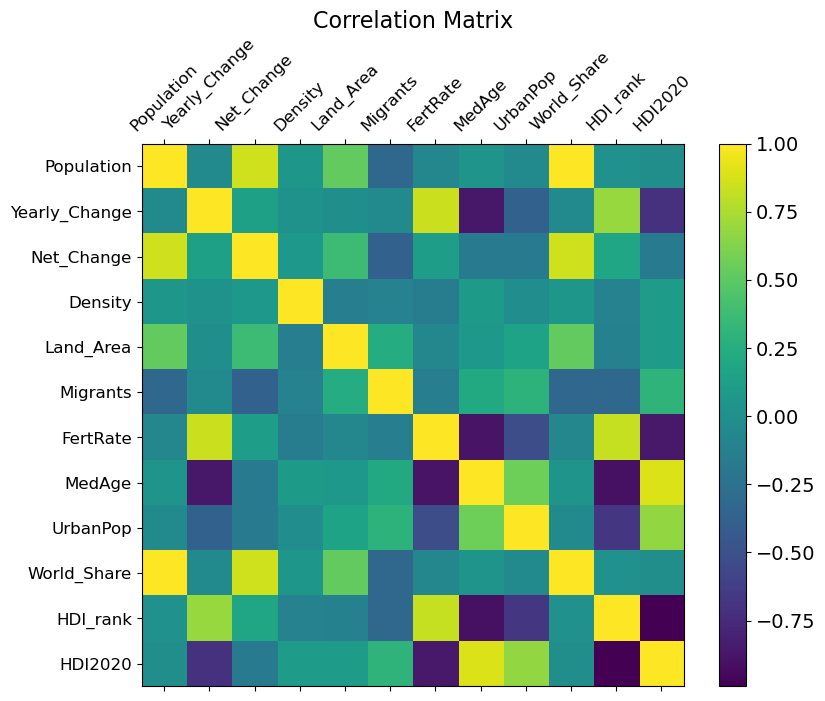

In [26]:
f = plt.figure(figsize=(9, 7)) 
plt.matshow(HP.corr(), fignum=f.number)
plt.xticks(range(HP.select_dtypes(['number']).shape[1]), HP.select_dtypes(['number']).columns, fontsize=12, rotation=45) 
plt.yticks(range(HP.select_dtypes(['number']).shape[1]), HP.select_dtypes(['number']).columns, fontsize=12) 
cb = plt.colorbar() #图例
cb.ax.tick_params(labelsize=14) 
plt.title('Correlation Matrix', fontsize=16) 

Text(0.5, 1.0, 'correlation Matrix')

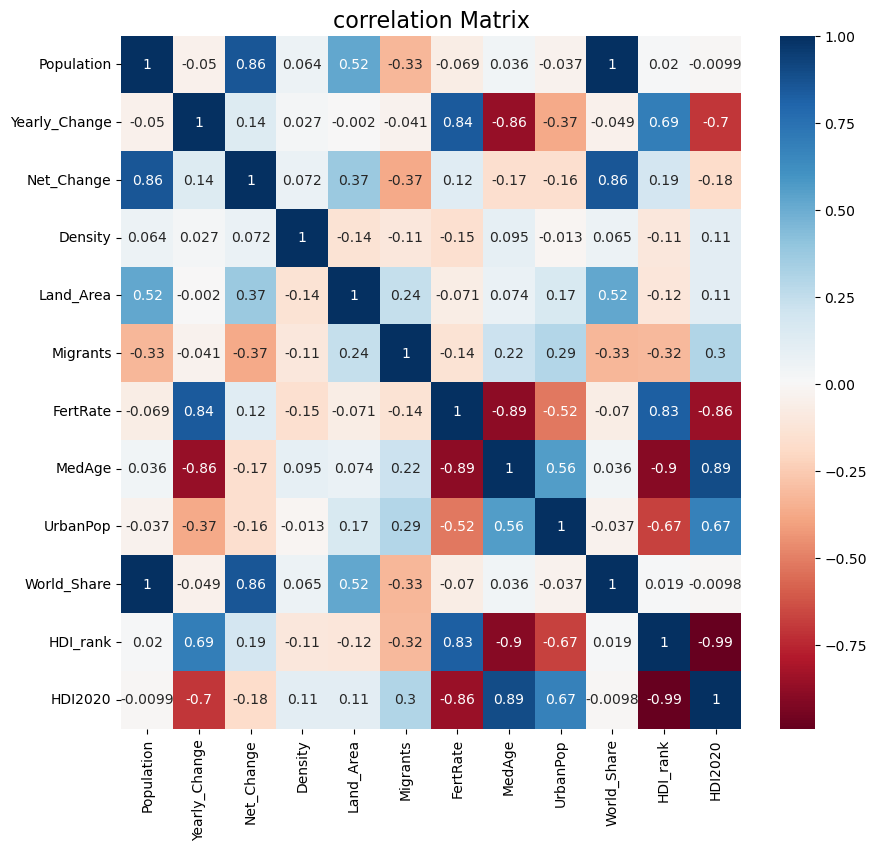

In [27]:
import seaborn as sns
f = plt.figure(figsize=(10, 9)) 
sns.heatmap(HP.corr(), annot=True, cmap='RdBu', xticklabels=1, yticklabels=1,)
plt.title('correlation Matrix', fontsize=16)

In [28]:

from statsmodels.formula.api import ols 
lm = ols('HDI2020 ~ Yearly_Change', data=HP).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HDI2020   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           2.27e-25
Time:                        15:38:18   Log-Likelihood:                 39.217
No. Observations:                 161   AIC:                            -74.43
Df Residuals:                     159   BIC:                            -68.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0302      0.039     26.246      0.000       0.953       1.108
Yearly_Change    -0.9045      0.072    -12.486      0.000      -1.048      -0.761
==============================================================================
Omnibus:                        7.887   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.837
Skew:                           0.375   Prob(JB):                       0.0121
Kurtosis:                       3.869   Cond. No.                         6.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The 2020 population change rate and the country's HDI index unary regression of that year:
y = -0.904 x + 1.03
R^2 =  0.49507966914675694
p-value of greenery =  0.0
p-value of intercept =  0.0


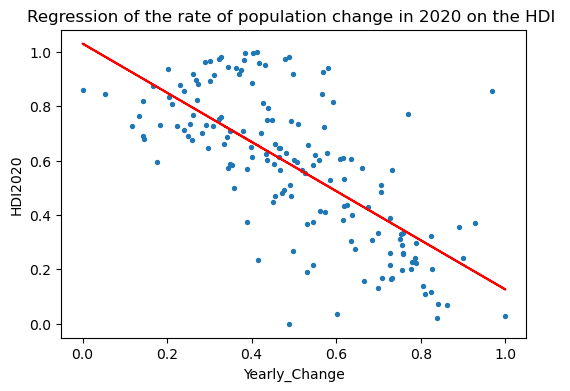

In [29]:

ychdi_reg = smf.ols(formula='HDI2020 ~ Yearly_Change',data=HP).fit()

beta_6, beta_7 = ychdi_reg.params
rsq4    = ychdi_reg.rsquared
pval_6, pval_7 = ychdi_reg.pvalues
print("The 2020 population change rate and the country's HDI index unary regression of that year:")
print("y =", round(beta_7,3), "x +", round(beta_6,3))
print("R^2 = ", rsq4)
print("p-value of greenery = ", round(pval_7,5))
print("p-value of intercept = ", round(pval_6,5))

fig, ax = plt.subplots()
HP.plot(kind='scatter', x='Yearly_Change', y='HDI2020', figsize=(6, 4), ax = ax,s=8)
plt.title(label = "Regression of the rate of population change in 2020 on the HDI ")
X = HP.Yearly_Change
b = plt.plot(X, X*beta_7 + beta_6, 'r') 

In [30]:
import matplotlib
import matplotlib.pyplot as plt

In [31]:
HP

,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,FertRate,MedAge,UrbanPop,World_Share,HDI_rank,HDI2020
0,1.000000e+00,0.335260,0.424032,0.067501,1.000000,0.123892,0.070175,0.696970,0.564706,1.000000,0.410526,0.659686
1,9.587838e-01,0.450867,1.000000,0.206527,0.316672,0.000000,0.157895,0.393939,0.258824,0.958311,0.689474,0.446771
2,2.299186e-01,0.373796,0.166177,0.015199,0.974351,1.000000,0.087719,0.696970,0.823529,0.230103,0.105263,0.931937
3,1.899811e-01,0.466281,0.234916,0.066607,0.192936,0.291586,0.175439,0.454545,0.505882,0.190038,0.594737,0.563700
4,1.534119e-01,0.645472,0.337201,0.127403,0.082082,0.201216,0.403509,0.242424,0.258824,0.153221,0.842105,0.273997
...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.495248e-05,0.562620,0.027607,0.064819,0.000054,0.357573,0.403509,0.242424,0.517647,0.000000,0.710526,0.413613
157,1.014017e-05,0.348748,0.027512,0.147072,0.000004,0.357976,0.140351,0.515152,0.258824,0.000000,0.352632,0.708551
158,5.395956e-06,0.481696,0.027561,0.064819,0.000045,0.357573,0.403509,0.212121,0.129412,0.000000,0.473684,0.626527
159,2.904339e-07,0.379576,0.027519,0.094770,0.000017,0.357976,0.210526,0.575758,0.505882,0.000000,0.373684,0.710297


In [32]:

from statsmodels.formula.api import ols 
lm = ols('HDI2020 ~ MedAge + FertRate + UrbanPop', data=HP).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HDI2020   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     311.7
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           6.96e-66
Time:                        15:38:18   Log-Likelihood:                 140.35
No. Observations:                 161   AIC:                            -272.7
Df Residuals:                     157   BIC:                            -260.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3108      0.050      6.183      0.000       0.212       0.410
MedAge         0.4866      0.066      7.364      0.000       0.356       0.617
FertRate      -0.3430      0.079     -4.358      0.000      -0.498      -0.188
UrbanPop       0.2501      0.037      6.702      0.000       0.176       0.324
==============================================================================
Omnibus:                        4.583   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                6.202
Skew:                          -0.011   Prob(JB):                       0.0450
Kurtosis:                       3.961   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
HDI_MFU = HP.loc[:,['HDI2020', 'MedAge', 'FertRate','UrbanPop']]
HDI_MFU

,HDI2020,MedAge,FertRate,UrbanPop
0,0.659686,0.696970,0.070175,0.564706
1,0.446771,0.393939,0.157895,0.258824
2,0.931937,0.696970,0.087719,0.823529
3,0.563700,0.454545,0.175439,0.505882
4,0.273997,0.242424,0.403509,0.258824
...,...,...,...,...
156,0.413613,0.242424,0.403509,0.517647
157,0.708551,0.515152,0.140351,0.258824
158,0.626527,0.212121,0.403509,0.129412
159,0.710297,0.575758,0.210526,0.505882


In [34]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [35]:
HDI_MFU_VIF = drop_column_using_vif_(HDI_MFU .drop('HDI2020', axis=1))

Dropping: MedAge


In [36]:

from statsmodels.formula.api import ols 
lm = ols('HDI2020 ~ FertRate + UrbanPop', data=HP).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HDI2020   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     329.5
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           4.29e-57
Time:                        15:38:18   Log-Likelihood:                 116.46
No. Observations:                 161   AIC:                            -226.9
Df Residuals:                     158   BIC:                            -217.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6196      0.032     19.323      0.000       0.556       0.683
FertRate      -0.8311      0.049    -16.941      0.000      -0.928      -0.734
UrbanPop       0.3203      0.042      7.679      0.000       0.238       0.403
==============================================================================
Omnibus:                        2.705   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.259   Jarque-Bera (JB):                2.331
Skew:                          -0.186   Prob(JB):                        0.312
Kurtosis:                       3.458   Cond. No.                         7.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

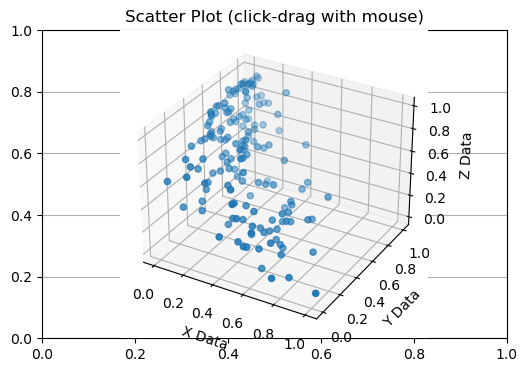

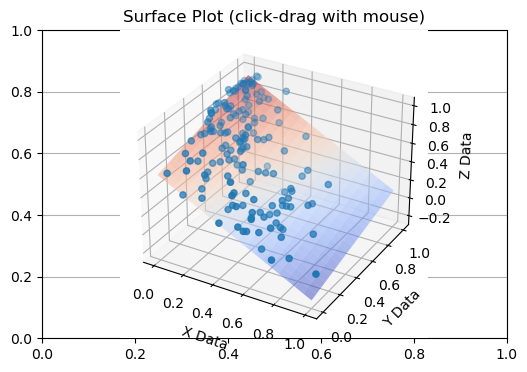

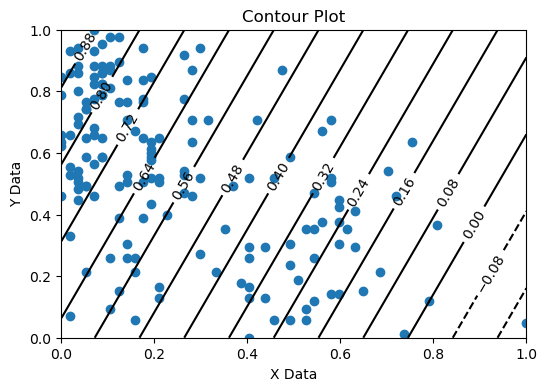

fitted prameters [-0.83112297  0.32032185  0.61955712]
RMSE: 0.11738351678179387
R-squared: 0.8065869023619634


In [37]:
import numpy, scipy, scipy.optimize
import matplotlib
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red
import matplotlib.pyplot as plt

graphWidth = 600 # units are pixels
graphHeight = 400 # units are pixels

# 3D contour plot lines
numberOfContourLines = 16


def SurfacePlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    #axes = Axes3D(f)
    axes=f.add_subplot(111, projection='3d')

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True,alpha = 0.5)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title('Surface Plot (click-drag with mouse)') # add a title for surface plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    axes.set_zlabel('Z Data') # Z axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def ContourPlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot(x_data, y_data, 'o')

    axes.set_title('Contour Plot') # add a title for contour plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    CS = matplotlib.pyplot.contour(X, Y, Z, numberOfContourLines, colors='k')
    matplotlib.pyplot.clabel(CS, inline=1, fontsize=10) # labels for contours

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def ScatterPlot(data):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    #axes = Axes3D(f)
    axes=f.add_subplot(111, projection='3d')
    
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    axes.scatter(x_data, y_data, z_data)

    axes.set_title('Scatter Plot (click-drag with mouse)')
    axes.set_xlabel('X Data')
    axes.set_ylabel('Y Data')
    axes.set_zlabel('Z Data')

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def func(data, a, b, c):
    x = data[0]
    y = data[1]
    return (a * x) + (y * b) + c


if __name__ == "__main__":
    xData = HP.FertRate
    yData = HP.UrbanPop
    zData = HP.HDI2020 
    data = [xData, yData, zData]

    initialParameters = [1.0, 1.0, 1.0] # these are the same as scipy default values in this example

    # here a non-linear surface fit is made with scipy's curve_fit()
    fittedParameters, pcov = scipy.optimize.curve_fit(func, [xData, yData], zData, p0 = initialParameters)

    ScatterPlot(data)
    SurfacePlot(func, data, fittedParameters)
    ContourPlot(func, data, fittedParameters)

    print('fitted prameters', fittedParameters)

    modelPredictions = func(data, *fittedParameters) 

    absError = modelPredictions - zData

    SE = numpy.square(absError) # squared errors
    MSE = numpy.mean(SE) # mean squared errors
    RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (numpy.var(absError) / numpy.var(zData))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

residuals: 
0      0.082434
1      0.124463
2     -0.121491
3      0.072091
4      0.093102
         ...   
156    0.036393
157   -0.122736
158   -0.300882
159   -0.103668
160   -0.135091
Length: 161, dtype: float64


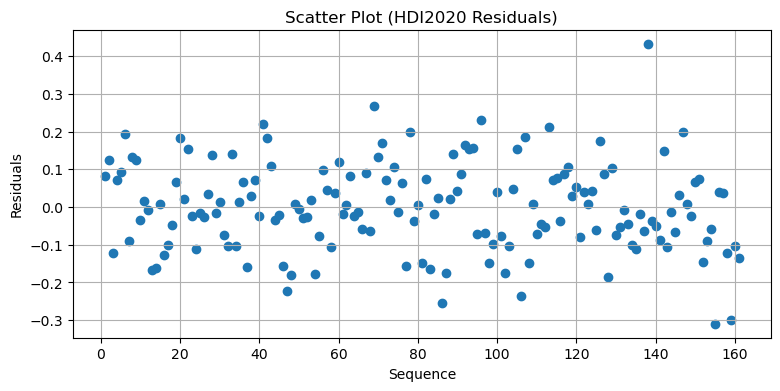

In [38]:

h_f_u = ols('HDI2020 ~ FertRate + UrbanPop', data=HP).fit()
x = HP[["FertRate", "UrbanPop"]]
y = HP["HDI2020"]
y_predit = h_f_u.predict(x)

residuals_m_y = y_predit - y

print("residuals: ")
print(residuals_m_y)

# plt.scatter
fig, (ax0) = plt.subplots(1, 1, figsize=(9, 4))
matplotlib.pyplot.grid(True)

ax0.scatter([i+1 for i in range(len(y))], residuals_m_y)

ax0.set_title('Scatter Plot (HDI2020 Residuals)')
ax0.set_xlabel('Sequence')
ax0.set_ylabel('Residuals')

plt.show()
plt.close('all')

In [39]:
import pandas as pd

import matplotlib.cm
from matplotlib import colors
import matplotlib.pyplot as plt 
import numpy as np              
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

from sklearn.preprocessing import RobustScaler
import sklearn


num_clusters = 2
mos = HP
data2=mos[["Migrants","UrbanPop","HDI2020"]]
print(data2)

     Migrants  UrbanPop   HDI2020
0    0.123892  0.564706  0.659686
1    0.000000  0.258824  0.446771
2    1.000000  0.823529  0.931937
3    0.291586  0.505882  0.563700
4    0.201216  0.258824  0.273997
..        ...       ...       ...
156  0.357573  0.517647  0.413613
157  0.357976  0.258824  0.708551
158  0.357573  0.129412  0.626527
159  0.357976  0.505882  0.710297
160  0.358111  0.152941  0.701571

[161 rows x 3 columns]


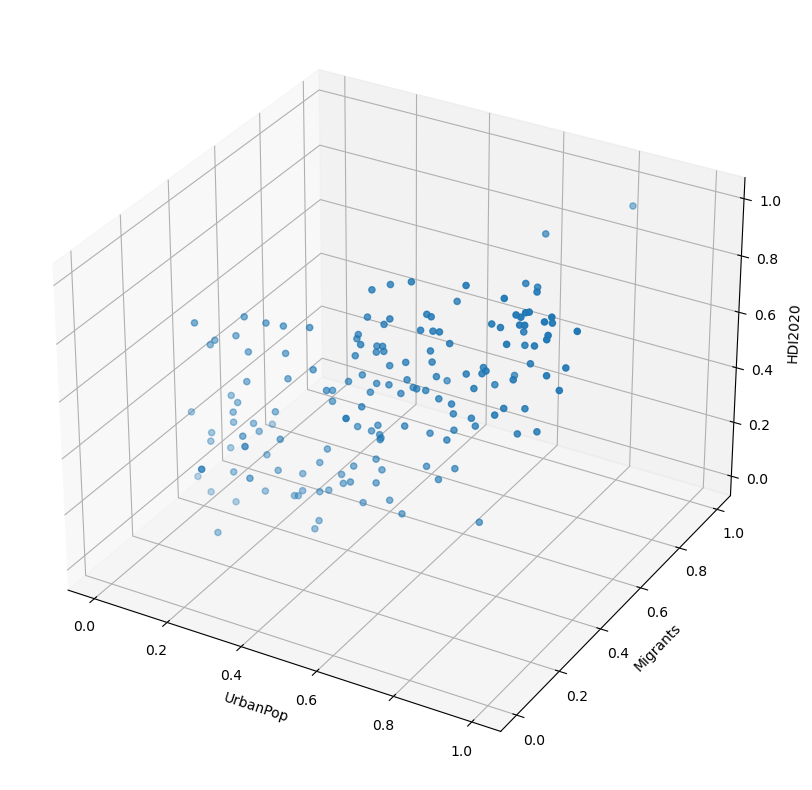

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
x=data2['UrbanPop']
y=data2['Migrants']
z=data2['HDI2020']
ax.scatter(x, y, z)
ax.set_xlabel("UrbanPop")
ax.set_ylabel("Migrants")
ax.set_zlabel("HDI2020")
plt.show( )

In [41]:

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

data2_standardised = data2.copy()
for c in data2.columns.values:
    data2_standardised[c] = mms.fit_transform(data2[c].values.reshape(-1,1))
data2_standardised.head()

,Migrants,UrbanPop,HDI2020
0,0.123892,0.564706,0.659686
1,0.000000,0.258824,0.446771
2,1.000000,0.823529,0.931937
3,0.291586,0.505882,0.563700
4,0.201216,0.258824,0.273997


In [42]:
random_state_seed = 1000
kmeans_output = sklc.KMeans(n_clusters=num_clusters, random_state=random_state_seed).fit(data2_standardised)

print(kmeans_output) 



KMeans(n_clusters=2, random_state=1000)


In [43]:
clustering_ids_kmeans = kmeans_output.labels_

print(clustering_ids_kmeans)

[1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0
 1 0 1 1 0 0 0 0 0 0 0 1 0]


In [44]:
# we will combine the clustering IDs to the dataframe
data2 = data2.assign(cluster_id = clustering_ids_kmeans)

#Have a look at the result:
print(data2)

     Migrants  UrbanPop   HDI2020  cluster_id
0    0.123892  0.564706  0.659686           1
1    0.000000  0.258824  0.446771           0
2    1.000000  0.823529  0.931937           1
3    0.291586  0.505882  0.563700           0
4    0.201216  0.258824  0.273997           0
..        ...       ...       ...         ...
156  0.357573  0.517647  0.413613           0
157  0.357976  0.258824  0.708551           0
158  0.357573  0.129412  0.626527           0
159  0.357976  0.505882  0.710297           1
160  0.358111  0.152941  0.701571           0

[161 rows x 4 columns]


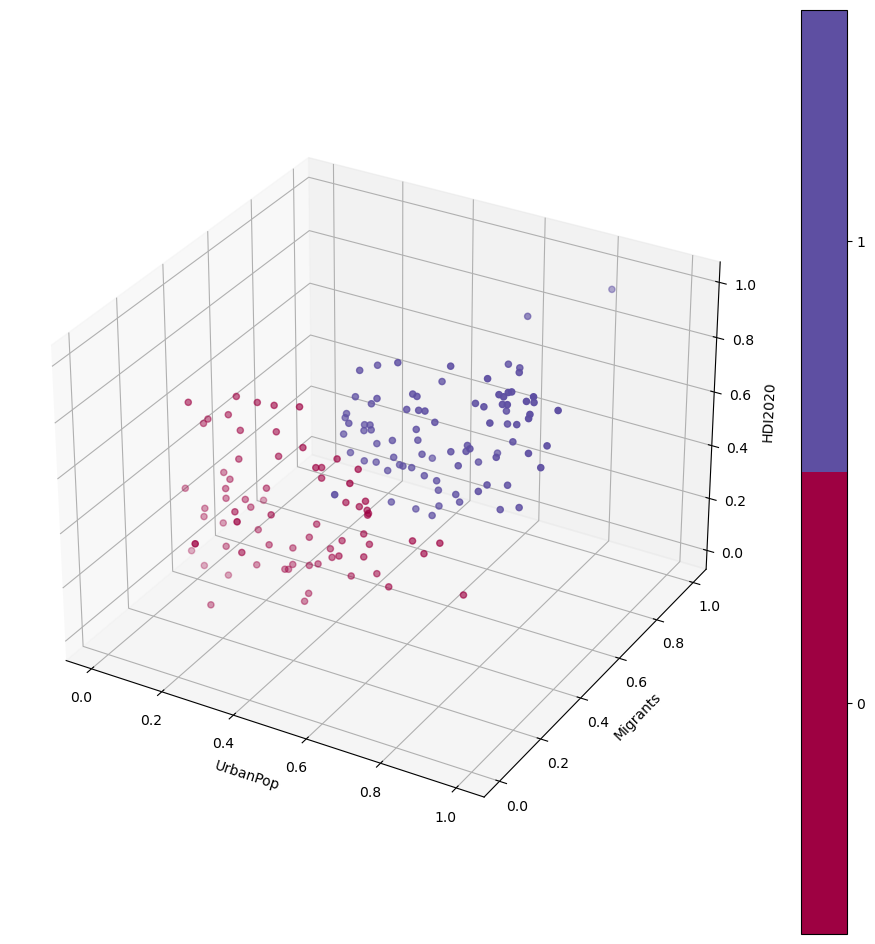

In [45]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111, projection='3d')

# number of clusters
n_clusters = data2.cluster_id.nunique()

# get discrete colormap
cmap = plt.get_cmap('Spectral', n_clusters)

# scatter points
x=data2['UrbanPop']
y=data2['Migrants']
z=data2['HDI2020']
scatter =ax.scatter(x, y, z, c=data2.cluster_id, cmap=cmap)
ax.set_xlabel("UrbanPop")
ax.set_ylabel("Migrants")
ax.set_zlabel("HDI2020")

cbar = plt.colorbar(scatter)
# set ticks locations (not very elegant, but it works):
# - shift by 0.5
# - scale so that the last value is at the center of the last color
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cbar.set_ticks(tick_locs)

# set tick labels (as before)
cbar.set_ticklabels(np.arange(n_clusters))

In [46]:
X = data2_standardised[['Migrants','UrbanPop','HDI2020']]
random_state_seed = 1000
df_silhouette_score = pd.DataFrame({'n_cluster':[2,3,4,5,6], 'silhouette_score':[0,0,0,0,0]})
for index, row in df_silhouette_score.iterrows():
    n_clusters = row['n_cluster']
    clusterer = sklc.KMeans(n_clusters=n_clusters, random_state=random_state_seed).fit(X)
    cluster_labels = clusterer.labels_
   
    silhouette_avg = sklm.silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    row['silhouette_score'] = silhouette_avg

For n_clusters = 2 The average silhouette_score is : 0.4798584293506951
For n_clusters = 3 The average silhouette_score is : 0.37447938914495543
For n_clusters = 4 The average silhouette_score is : 0.35402367758861925
For n_clusters = 5 The average silhouette_score is : 0.3557587336645259
For n_clusters = 6 The average silhouette_score is : 0.37071614233175487
